In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Load the DS 
df = pd.read_csv('cleaned_data.csv')
df.head(10)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,month,hour,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,1,0,0,0
1,4.00,4.46,0.0,1,0,0,0
2,3.24,3.28,0.0,1,0,0,0
3,3.31,3.56,0.0,1,1,0,0
4,3.82,4.50,0.0,1,1,0,0
5,3.28,3.56,0.0,1,1,0,0
6,3.60,4.14,0.0,1,1,0,0
7,3.60,4.28,0.0,1,2,0,0
8,3.28,3.64,0.0,1,2,0,0
9,3.78,4.72,0.0,1,2,0,0


In [38]:
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']


n = len(X)
# Calculating where the training data should end
train_end = int(n*0.75)
# Calculating where the val data should end
test_end = train_end + int(n*0.25)  
# Taking first 75% of the DS for training
X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
# Taking next 15% of the DS for testing
X_test, y_test = X.iloc[train_end:test_end], y.iloc[train_end:test_end]

print('Shape of training data:', X_train.shape, y_train.shape)
print('Shape of test data:', X_test.shape, y_test.shape)

Shape of training data: (19710, 6) (19710,)
Shape of test data: (6570, 6) (6570,)


In [39]:
# Training the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=30)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [40]:
# Making predictions
prediction = model.predict(X_test)

In [41]:
# Evaluating the mode
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error: 3.29
Mean Squared Error: 46.60
Root Mean Squared Error: 6.83
R^2 Score: 0.93


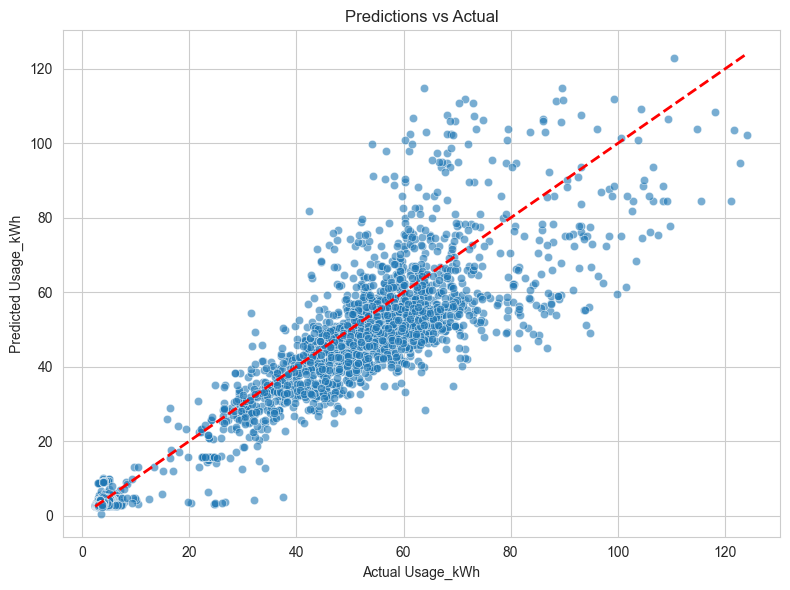

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=prediction.flatten(), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Usage_kWh')
plt.ylabel('Predicted Usage_kWh')
plt.title('Predictions vs Actual')
plt.tight_layout()
plt.show()

In [43]:
# Testing the model with new data
new_data = {
    'Lagging_Current_Reactive.Power_kVarh': 2.95,
    'Leading_Current_Reactive_Power_kVarh': 0,
    'month': 1,
    'hour': 0,
    'Load_Type_Maximum_Load': 0,
    'Load_Type_Medium_Load': 0,
}


new_data_df = pd.DataFrame([new_data])
new_prediction = model.predict(new_data_df)
print(f'Predicted Usage_kWh for new data: {new_prediction[0]:.2f}')

Predicted Usage_kWh for new data: 3.17


In [ ]:
# Xboost model has better performance than deep learning model on this DS.